# 분석 결과 확인

In [69]:
import numpy as np
import pandas as pd

In [70]:
analysis_result = pd.read_csv("submission.csv")
analysis_result = analysis_result.fillna(0)
analysis_result

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,url,use_tmi_words_value,similar_sentence_value,commissional_words_value,commission_image_value,image_similarity_value,class,regression
0,0,0,0,0,0,https://blog.naver.com/1457dudgus/222565835669,8,573,1,0,0.018,1,1
1,1,1,1,1,1,https://blog.naver.com/jangingin/222544329875,9,914,1,0,0.002,1,1
2,2,2,2,2,2,https://blog.naver.com/apfjtzzz/222354696565,12,706,0,0,0.006,2,1
3,3,3,3,3,3,https://blog.naver.com/help1207/222548639407,15,1535,1,0,0.018,1,1
4,4,4,4,4,4,https://blog.naver.com/wd4367/222576151259,5,1772,0,0,0.024,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2809,2809,2809,2809,2809,https://blog.naver.com/ekdms7146/222527946737,2,67,0,0,0.002,2,2
2810,2810,2810,2810,2810,2810,https://blog.naver.com/dbsdustn007/222537839304,2,71,0,0,0.024,0,1
2811,2811,2811,2811,2811,2811,https://blog.naver.com/hopeu_self90/222300219919,3,236,1,0,0.014,1,1
2812,2812,2812,2812,2812,2812,https://blog.naver.com/sparkdanmuji/222282109032,10,1474,1,0,0.030,1,1


In [71]:
analysis_result.shape

(2814, 13)

# 분석 결과 정규화

In [72]:
def normalization(data_set):
    x_max = max(data_set)
    x_min = min(data_set)
    
    # 최댓값 최솟값이 둘다 0이라면 어차피, 0으로 이루어진 리스트이므로 그대로 반환
    if(x_max - x_min) == 0:
        return data_set
    
    result = np.array((data_set - x_min) / (x_max - x_min))
    
    return result.tolist()

In [73]:
analysis_result["use_tmi_words_value"] = normalization(analysis_result["use_tmi_words_value"])
analysis_result["similar_sentence_value"] = normalization(analysis_result["similar_sentence_value"])
analysis_result["commissional_words_value"] = normalization(analysis_result["commissional_words_value"])
analysis_result["commission_image_value"] = normalization(analysis_result["commission_image_value"])
analysis_result["image_similarity_value"] = normalization(analysis_result["image_similarity_value"])

analysis_result

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,url,use_tmi_words_value,similar_sentence_value,commissional_words_value,commission_image_value,image_similarity_value,class,regression
0,0,0,0,0,0,https://blog.naver.com/1457dudgus/222565835669,0.123077,0.045787,1.0,0.0,0.45,1,1
1,1,1,1,1,1,https://blog.naver.com/jangingin/222544329875,0.138462,0.073228,1.0,0.0,0.05,1,1
2,2,2,2,2,2,https://blog.naver.com/apfjtzzz/222354696565,0.184615,0.056490,0.0,0.0,0.15,2,1
3,3,3,3,3,3,https://blog.naver.com/help1207/222548639407,0.230769,0.123199,1.0,0.0,0.45,1,1
4,4,4,4,4,4,https://blog.naver.com/wd4367/222576151259,0.076923,0.142271,0.0,0.0,0.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2809,2809,2809,2809,2809,https://blog.naver.com/ekdms7146/222527946737,0.030769,0.005070,0.0,0.0,0.05,2,2
2810,2810,2810,2810,2810,2810,https://blog.naver.com/dbsdustn007/222537839304,0.030769,0.005391,0.0,0.0,0.60,0,1
2811,2811,2811,2811,2811,2811,https://blog.naver.com/hopeu_self90/222300219919,0.046154,0.018669,1.0,0.0,0.35,1,1
2812,2812,2812,2812,2812,2812,https://blog.naver.com/sparkdanmuji/222282109032,0.153846,0.118291,1.0,0.0,0.75,1,1


# Classification

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

# 특징 요소 분리
feature = analysis_result[["use_tmi_words_value", "similar_sentence_value", "commissional_words_value", "commission_image_value", "image_similarity_value"]]

# 세개의 군집으로 분리
# 각 군집은, 바이럴 데이터 정도 낮음, 중간, 높음을 의미함
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict], axis=1)

predict['predict']

0       0
1       0
2       1
3       0
4       2
       ..
2809    1
2810    2
2811    0
2812    0
2813    1
Name: predict, Length: 2814, dtype: int32

In [75]:
doubt_num = 0
viral_num = 1
none_num = 2

for i in range(0, len(analysis_result)):
    if analysis_result['commissional_words_value'][i] == 1 or analysis_result['commission_image_value'][i] == 1:
        viral_num = predict['predict'][i]
        break
        
        
tmi_avr = np.mean(analysis_result['use_tmi_words_value'].tolist())
sentence_avr = np.mean(analysis_result['similar_sentence_value'].tolist())
image_avr = np.mean(analysis_result['image_similarity_value'].tolist())

for i in range(0, len(analysis_result)):
    if analysis_result['commissional_words_value'][i] == 0 and analysis_result['commission_image_value'][i] == 0: 
        if analysis_result['use_tmi_words_value'][i] <= tmi_avr and analysis_result['similar_sentence_value'][i] <= sentence_avr and analysis_result['image_similarity_value'][i] <= image_avr:
            none_num = predict['predict'][i]
            break
        
for i in range(0, len(analysis_result)):
    if predict['predict'][i] != viral_num and predict['predict'][i] != none_num:
        doubt_num = predict['predict'][i]
        break
        
        
        
        
for i in range(0, len(predict['predict'])):
    if predict['predict'][i] == viral_num:
        predict['predict'][i] = 1
    elif predict['predict'][i] == none_num:
        predict['predict'][i] = 2
    elif predict['predict'][i] == doubt_num:
        predict['predict'][i] = 0

In [55]:
# submission.csv에 기록
f = pd.read_csv("submission.csv")
f = f.fillna(0)
f['class'] = predict['predict']

f.to_csv('submission.csv', mode='w')

# XGBoost Regression

In [76]:
import xgboost
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [77]:
temp_tmi_avr = np.mean(analysis_result['use_tmi_words_value'].tolist())
temp_sentence_avr = np.mean(analysis_result['similar_sentence_value'].tolist())
temp_image_avr = np.mean(analysis_result['image_similarity_value'].tolist())

commission_data_mask = (analysis_result.commissional_words_value == 1) | (analysis_result.commission_image_value == 1)
none_commission_data_mask = (analysis_result.commissional_words_value != 1) & (analysis_result.commission_image_value != 1) & (analysis_result.use_tmi_words_value <= temp_tmi_avr) & (analysis_result.similar_sentence_value <= temp_sentence_avr) & (analysis_result.image_similarity_value <= temp_image_avr)
commission_data = analysis_result.loc[commission_data_mask,:]
none_commission_data = analysis_result.loc[none_commission_data_mask,:]

temp_data_set = commission_data.append(none_commission_data)



X = temp_data_set[["use_tmi_words_value", "similar_sentence_value", "image_similarity_value"]]
Y_words = temp_data_set[["commissional_words_value", "commission_image_value"]]["commissional_words_value"].tolist()
Y_image = temp_data_set[["commissional_words_value", "commission_image_value"]]["commission_image_value"].tolist()

Y = list()

for i in range(0, len(Y_words)):
    if(Y_words[i] == 1 or Y_image[i] == 1):
        Y.append(1)
    else:
        Y.append(0)

        
data_dmatrix = xgboost.DMatrix(data=X,label=Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(objective = 'reg:linear', n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)


1291 144
[14:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.75, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

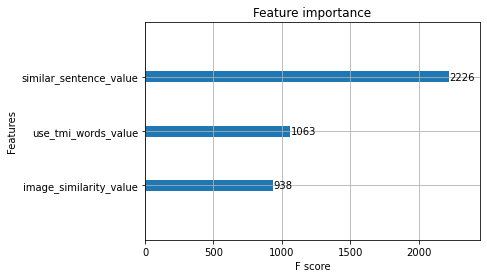

In [78]:
xgboost.plot_importance(xgb_model)

In [79]:
predictions_probs = xgb_model.predict(X_test)
predictions_probs

array([ 0.17379753,  0.26503983,  0.9848889 ,  0.97433114,  0.47118747,
        0.19476505,  1.0003054 ,  1.0020287 ,  0.7253558 ,  1.0030144 ,
        0.99808645,  0.96672666,  0.9886902 ,  0.01233224,  1.0209422 ,
        1.0003054 ,  1.0003054 ,  0.39269075,  0.61727697,  0.17567158,
        0.23620579,  0.2059742 ,  0.28257334,  1.0003054 ,  1.0091231 ,
        1.0691737 ,  0.9983559 ,  0.10592645,  0.9853865 ,  1.0003054 ,
        0.02942783,  0.50331223,  0.71220297,  0.93933207,  0.96993846,
        0.11467367,  1.0000387 , -0.01489537,  1.0186752 ,  0.8584751 ,
        0.08264905,  0.97653794,  0.25848034,  0.6538837 ,  1.0003054 ,
        0.9724047 ,  1.0003589 ,  0.13842441,  0.40707082,  0.22589186,
        1.0020287 ,  0.97101283,  0.24525937,  0.12140505,  0.36164993,
        0.99878436,  0.06099889,  1.0239993 ,  0.3534545 ,  0.6354458 ,
        0.61047924,  1.0003054 ,  1.0179714 ,  0.37147713,  0.05383738,
        0.28475216,  0.04029733,  1.0145266 , -0.00364506,  1.01

In [80]:
predictions = [ 1 if x > 0.5 else 0 for x in predictions_probs]
predictions

[0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [82]:
def get_clf_eval(y_test, pred, pred_probs):
   confusion = confusion_matrix(y_test, pred)
   accuracy = accuracy_score(y_test, pred)
   precision = precision_score(y_test, pred)
   recall = recall_score(y_test, pred)
   f1 = f1_score(y_test, pred)
   # ROC-AUC
   roc_auc = roc_auc_score(y_test, pred_probs)
   print('오차 행렬')
   print(confusion)
   # ROc-AUC
   print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f},\
   F1 : {:.4f}, AUC : {:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [83]:
get_clf_eval(y_test, predictions, predictions_probs)

오차 행렬
[[42  9]
 [15 78]]
정확도 : 0.8333, 정밀도 : 0.8966, 재현율 : 0.8387,   F1 : 0.8667, AUC : 0.9116


In [64]:
r_sq = xgb_model.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, predictions_probs))
params = {"objective":"reg:linear",'n_estimators': 100,'learning_rate': 0.08,'gamma': 0, 'subsample': 0.75, 'colsample_bytree': 1, 'max_depth': 7}
cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print("score:", r_sq)
print("f1-score:", r_sq)
print("explained_variance_score:", explained_variance_score(predictions_probs,y_test))
print("RMSE:", rmse)


[14:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed dow

In [65]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.472744,0.001196,0.474493,0.001031
1,0.447958,0.002420,0.451494,0.001279
2,0.425655,0.003057,0.430785,0.002458
3,0.405739,0.003963,0.412808,0.003171
4,0.387831,0.004714,0.396912,0.004184


실제 예측단계

In [66]:
predictions_probs = xgb_model.predict(analysis_result[["use_tmi_words_value", "similar_sentence_value", "image_similarity_value"]])
predictions = [ 1 if x > 0.5 else 0 for x in predictions_probs]
regression_result = list()

for p in predictions:
    if p == 0:
        regression_result.append(2)
        
    else:
        regression_result.append(1)

In [67]:
# submission.csv에 기록
f = pd.read_csv("submission.csv")
f = f.fillna(0)
f['regression'] = regression_result

f.to_csv('submission.csv', mode='w')

# 모듈 종료 

In [68]:
print("text_module_finish")

text_module_finish
